GROUP 40 PROJECT 1

In [629]:
"""Importing functions"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn import metrics
import scipy.cluster.hierarchy as sch
import sklearn.cluster as skc
import sklearn.metrics.cluster as skmc

In [630]:
"""Importing files"""

from google.colab import files
uploaded = files.upload()

Saving Data8.csv to Data8 (5).csv
Saving Data7.csv to Data7 (5).csv
Saving Data6.csv to Data6 (5).csv
Saving Data5.csv to Data5 (5).csv
Saving Data4.csv to Data4 (5).csv
Saving Data3.csv to Data3 (5).csv
Saving Data2.csv to Data2 (5).csv
Saving Data1.csv to Data1 (5).csv


# **TASK 1**

Evaluation Matrix: Same for all data set
ACC = (TP+TN)/(TP+TN+FN+FP)
ACC = (TP+TN)/(P+N)

# **Dataset 1**

In [631]:
"""reading files"""

data1_k = pd.read_csv('Data1.csv')
data1_k

,Unnamed: 0,X1,X2,X3,Class
0,1,-0.063274,0.027734,0.022683,1
1,2,-0.000731,0.048211,0.069198,1
2,3,-0.060767,-0.009080,0.053085,1
3,4,0.013252,-0.011876,0.055324,1
4,5,-0.054508,-0.003813,0.001738,1
...,...,...,...,...,...
207,208,0.175738,-0.053478,-2.733752,7
208,209,0.396046,-0.858377,-3.126866,7
209,210,-0.406362,-0.334541,-2.885598,7
210,211,-0.299275,0.071281,-3.642585,7


## **KMeans for DS1**
Question 1

In [632]:
"""k-means clustering Algorithm"""

k = []
wcs = []
for i in range(1, 15):
  dl = KMeans(n_clusters=i)
  dl.fit(data1_k.iloc[:,1:4])
  k.append(i)
  wcs.append(dl.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


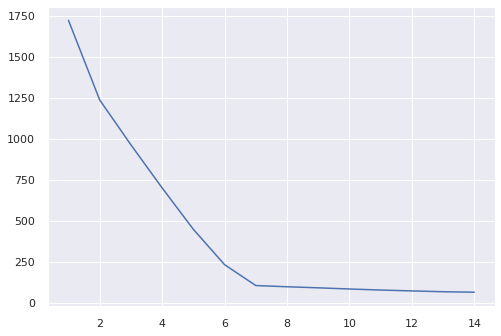

In [633]:
sns.lineplot(k, wcs)

In [634]:
dl = KMeans(n_clusters=7)
dl.fit(data1_k.iloc[:,1:4])
data1_k['predictor_class'] = dl.labels_
dl.cluster_centers_

array([[-4.72621667e-02,  4.58006333e-02, -3.04276190e+00],
       [-6.31190000e-03,  9.19421333e-02,  2.87236200e+00],
       [ 2.99953830e+00, -1.13086667e-03, -1.40059600e-01],
       [-4.24071875e-03,  4.75815625e-03,  7.24671875e-03],
       [-2.99518840e+00, -1.37363333e-02,  8.82396000e-02],
       [ 1.39986933e-01,  3.08174697e+00,  7.45050000e-02],
       [ 2.27123000e-02, -2.96813597e+00, -1.11774567e-01]])

In [635]:
data1_k.iloc[:,1:4]

,X1,X2,X3
0,-0.063274,0.027734,0.022683
1,-0.000731,0.048211,0.069198
2,-0.060767,-0.009080,0.053085
3,0.013252,-0.011876,0.055324
4,-0.054508,-0.003813,0.001738
...,...,...,...
207,0.175738,-0.053478,-2.733752
208,0.396046,-0.858377,-3.126866
209,-0.406362,-0.334541,-2.885598
210,-0.299275,0.071281,-3.642585


External Validation K-Means

In [636]:
"""External Validation Matrix"""

acc=metrics.accuracy_score(data1_k['Class'], data1_k['predictor_class'])
print("\nAccuracy_score",acc)
f1_score=metrics.f1_score(data1_k['Class'], data1_k['predictor_class'],average='macro')
print("\nF1_score",f1_score)


Accuracy_score 0.14150943396226415

F1_score 0.125


Question 3

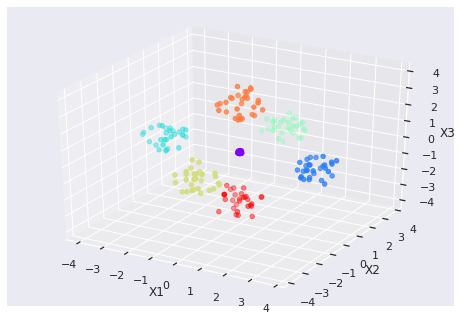

In [637]:
""" original class"""

ax = plt.axes(projection='3d')
zline = np.linspace(-4, 4)
xline = np.linspace(-4, 4)
yline = np.linspace(-4, 4)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3');
zdata = data1_k['X3']
xdata = data1_k['X1']
ydata = data1_k['X2'];
ax.scatter3D(xdata, ydata, zdata, c=data1_k['Class'], cmap='rainbow');

Question 4

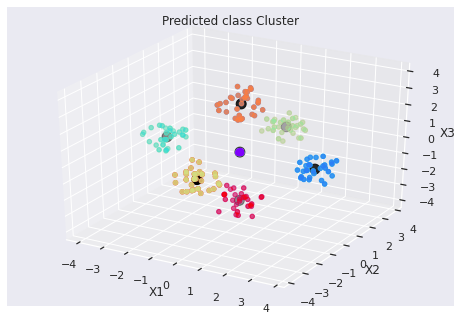

In [638]:
"""predicted clustering algorithm plot"""

ax = plt.axes(projection='3d')
ax.set_title('Predicted class Cluster');
zline = np.linspace(-4, 4)
xline = np.linspace(-4, 4)
yline = np.linspace(-4, 4) 
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3');
zdata = data1_k['X3']
xdata = data1_k['X1']
ydata = data1_k['X2'];
ax.scatter3D(xdata, ydata, zdata, c=data1_k['predictor_class'], cmap='rainbow');
ax.scatter3D(xdata, ydata, zdata, c=data1_k['Class'], cmap='rainbow');
ax.scatter3D(dl.cluster_centers_[:,0],dl.cluster_centers_[:,1],dl.cluster_centers_[:,2],s=100,c='black',label ='Centroids');

## **Hierarchical  Clustering/Dendogram**

In [639]:
data1_h = pd.read_csv('Data1.csv')
X = data1_h.iloc[:,1:4].values
data1_h

,Unnamed: 0,X1,X2,X3,Class
0,1,-0.063274,0.027734,0.022683,1
1,2,-0.000731,0.048211,0.069198,1
2,3,-0.060767,-0.009080,0.053085,1
3,4,0.013252,-0.011876,0.055324,1
4,5,-0.054508,-0.003813,0.001738,1
...,...,...,...,...,...
207,208,0.175738,-0.053478,-2.733752,7
208,209,0.396046,-0.858377,-3.126866,7
209,210,-0.406362,-0.334541,-2.885598,7
210,211,-0.299275,0.071281,-3.642585,7


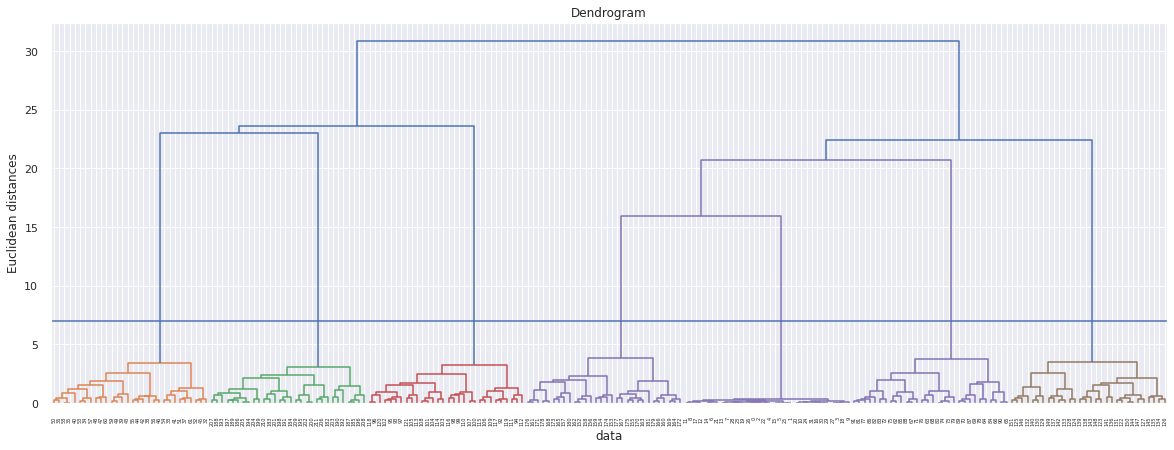

In [640]:
"""dendrogram"""

linked = sch.linkage(X,'ward',metric='euclidean')
plt.figure(figsize=(20, 7))
sch.dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('data')
plt.ylabel('Euclidean distances')
plt.axhline(y=7)
plt.show()

In [641]:
"""Clustering-Dendogram"""

clustering = skc.AgglomerativeClustering(n_clusters=7)
clustering.fit_predict(X)
clustering.labels_

"""print(f"Number of clusters = {1+np.amax(clustering.labels_)"""

'print(f"Number of clusters = {1+np.amax(clustering.labels_)'

In [642]:
acc=metrics.accuracy_score(data1_h['Class'],clustering.labels_)
print("\nAccuracy_score",acc)
f1_score=metrics.f1_score(data1_h['Class'], clustering.labels_,average='macro')
print("\nF1_score",f1_score)


Accuracy_score 0.0

F1_score 0.0


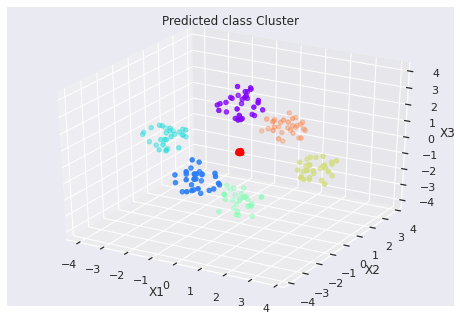

In [643]:
"""predicted class cluster"""

ax = plt.axes(projection='3d')
ax.set_title('Predicted class Cluster');
zline = np.linspace(-4, 4)
xline = np.linspace(-4, 4)
yline = np.linspace(-4, 4) 
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3');
zdata = data1_h['X3']
xdata = data1_h['X1']
ydata = data1_h['X2'];
ax.scatter3D(xdata, ydata, zdata, c=clustering.labels_, cmap='rainbow')


# **Dataset 2**


In [644]:
data2_K = pd.read_csv('Data2.csv')
data2_K.head(100)
data2_K.iloc[:,4].unique()

array([1, 2, 3, 4])

## KMeans Clustering

In [645]:
k = []
wcs = []
for i in range(1, 15):
  dl = KMeans(n_clusters=i)
  dl.fit(data2_K.iloc[:,1:4])
  k.append(i)
  wcs.append(dl.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


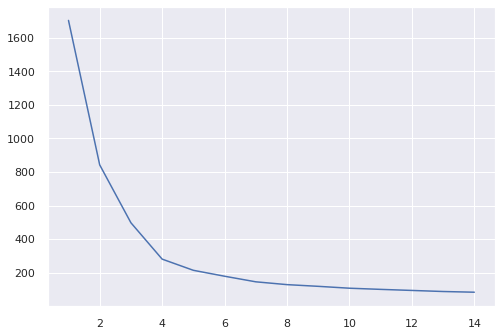

In [646]:
sns.lineplot(k, wcs)

In [647]:
dl = KMeans(n_clusters=4)
dl.fit(data2_K.iloc[:,1:4])
data2_K['predictor_class'] = dl.labels_
dl.cluster_centers_

array([[1.0118234 , 0.75530155, 0.5346417 ],
       [2.9348529 , 2.55931128, 2.55146488],
       [1.1534002 , 4.08301554, 1.04313881],
       [3.04451388, 0.51152101, 0.48663013]])

Question 2

In [648]:
acc=metrics.accuracy_score(data2_K['Class'], data2_K['predictor_class'])
print("\nAccuracy_score",acc)
f1_score=metrics.f1_score(data2_K['Class'], data2_K['predictor_class'],average='macro')
print("\nF1_score",f1_score)


Accuracy_score 0.18811881188118812

F1_score 0.1688888888888889


Question 3

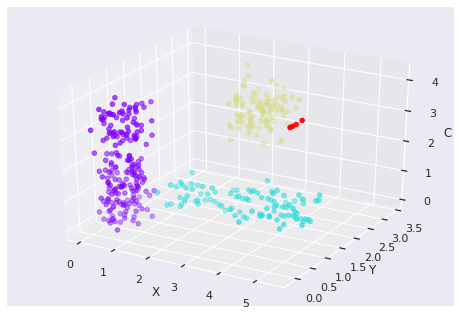

In [649]:
"""original class plot"""

ax = plt.axes(projection='3d')
zline = np.linspace(-4, 4)
xline = np.linspace(-4, 4)
yline = np.linspace(-4, 4)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('C');
zdata = data2_K['X']
xdata = data2_K['Y']
ydata = data2_K['C'];
ax.scatter3D(xdata, ydata, zdata, c=data2_K['Class'], cmap='rainbow');

Question 4


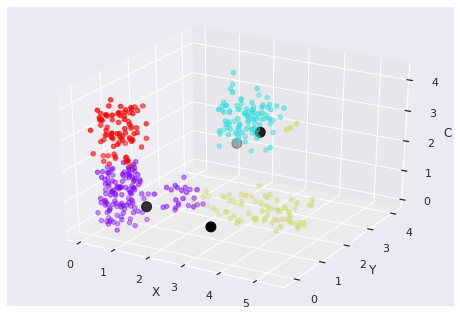

In [650]:
"""predicted class plot"""

ax = plt.axes(projection='3d')
zline = np.linspace(-4, 4)
xline = np.linspace(-4, 4)
yline = np.linspace(-4, 4)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('C');
zdata = data2_K['X']
xdata = data2_K['Y']
ydata = data2_K['C'];
ax.scatter3D(xdata, ydata, zdata, c=data2_K['predictor_class'], cmap='rainbow');
ax.scatter3D(dl.cluster_centers_[:,0],dl.cluster_centers_[:,1],dl.cluster_centers_[:,2],s=100,c='black',label ='Centroids');

## **Hierarchical  Clustering/Dendogram**

In [651]:
data2_H = pd.read_csv('Data2.csv')
X = data2_H.iloc[:,1:4].values
data2_H

,Unnamed: 0,X,Y,C,Class
0,X1,3.277701,0.814082,0.326574,1
1,X2,0.387577,0.176780,0.888046,1
2,X3,0.268546,0.582963,0.080981,1
3,X4,2.031145,0.244597,0.643921,1
4,X5,0.188677,0.461280,0.496633,1
...,...,...,...,...,...
399,X400,3.248655,2.297291,3.388138,3
400,X,4.100000,5.100000,0.504558,4
401,X.1,3.900000,4.900000,0.941634,4
402,X.2,4.000000,5.000000,0.702123,4


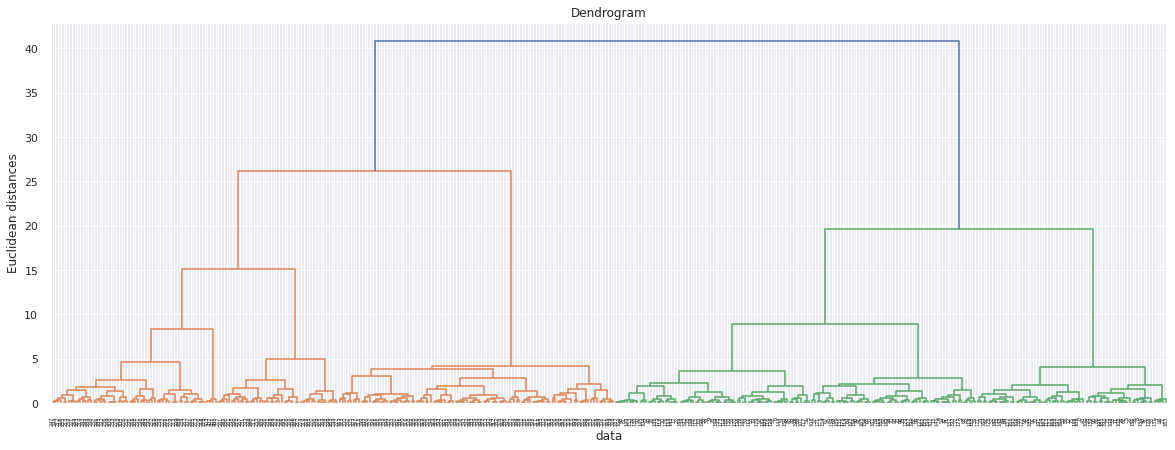

In [652]:
"""Dendogram"""

linked = sch.linkage(X,'ward',metric='euclidean')
plt.figure(figsize=(20, 7))
sch.dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('data')
plt.ylabel('Euclidean distances')
plt.show()



In [653]:

clustering = skc.AgglomerativeClustering(n_clusters=4)
clustering.fit_predict(X)
clustering.labels_

array([3, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3, 1, 1, 3,
       1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1,
       3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 1, 1, 3, 1,
       1, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,

Question 2

In [654]:
acc=metrics.accuracy_score(data2_H['Class'],clustering.labels_)
print("\nAccuracy_score",acc)
f1_score=metrics.f1_score(data2_H['Class'], clustering.labels_,average='macro')
print("\nF1_score",f1_score)


Accuracy_score 0.32425742574257427

F1_score 0.1583081570996979


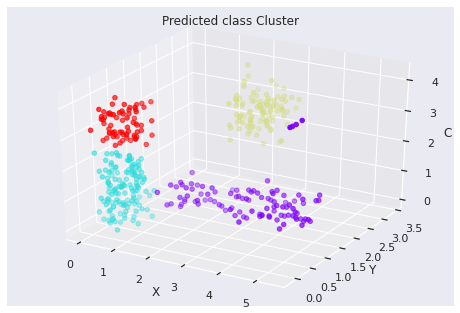

In [655]:
"""original class"""

ax = plt.axes(projection='3d')
ax.set_title('Predicted class Cluster');
zline = np.linspace(-4, 4)
xline = np.linspace(-4, 4)
yline = np.linspace(-4, 4) 
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('C');
zdata = data2_H['X']
xdata = data2_H['Y']
ydata = data2_H['C'];
ax.scatter3D(xdata, ydata, zdata, c=clustering.labels_, cmap='rainbow')

# **Dataset 3**


In [656]:
data3_K = pd.read_csv('Data3.csv')
data3_K.head(100)


,Unnamed: 0,X1,X2,X3,Class
0,1,1.295428,0.050829,-0.385217,1
1,2,1.409178,-0.035191,-0.251980,1
2,3,1.096803,0.246365,-0.415011,1
3,4,1.463328,0.265354,-0.513488,1
4,5,1.603284,0.080577,-0.470257,1
...,...,...,...,...,...
95,96,2.065866,0.209456,0.084316,1
96,97,1.923298,-0.703156,-0.246845,1
97,98,0.543922,-0.103244,-1.101993,1
98,99,2.078767,-0.492640,-0.146922,1


## **KMeans Clustering**

In [657]:
k = []
wcs = []
for i in range(1, 15):
  dl = KMeans(n_clusters=i)
  dl.fit(data3_K.iloc[:,1:4])
  k.append(i)
  wcs.append(dl.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


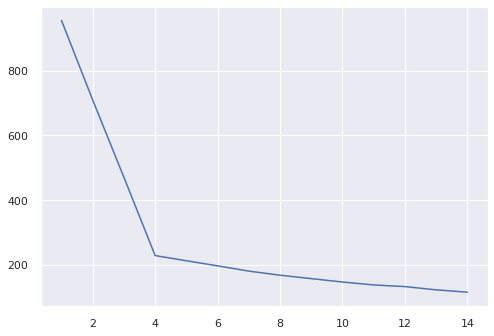

In [658]:
sns.lineplot(k, wcs)

Question 1

In [659]:
dl = KMeans(n_clusters=4)
dl.fit(data3_K.iloc[:,1:4])
data3_K['predictor_class'] = dl.labels_
dl.cluster_centers_

array([[ 1.3868734 , -0.06526492, -0.42573357],
       [-0.51838252, -1.16526495, -0.42573357],
       [ 0.11670268, -0.06526492,  1.37055896],
       [-0.51838252,  1.0347351 , -0.42573357]])

Question 2

In [660]:
acc=metrics.accuracy_score(data3_K['Class'], data3_K['predictor_class'])
print("\nAccuracy_score",acc)
f1_score=metrics.f1_score(data3_K['Class'], data3_K['predictor_class'],average='macro')
print("\nF1_score",f1_score)


Accuracy_score 0.0

F1_score 0.0


Question 3

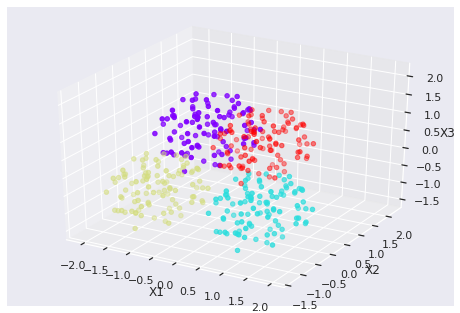

In [661]:
"""original class"""

ax = plt.axes(projection='3d')
zline = np.linspace(-4, 4)
xline = np.linspace(-4, 4)
yline = np.linspace(-4, 4)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3');
zdata = data3_K['X1']
xdata = data3_K['X2']
ydata = data3_K['X3'];
ax.scatter3D(xdata, ydata, zdata, c=data3_K['Class'], cmap='rainbow');

Question 4


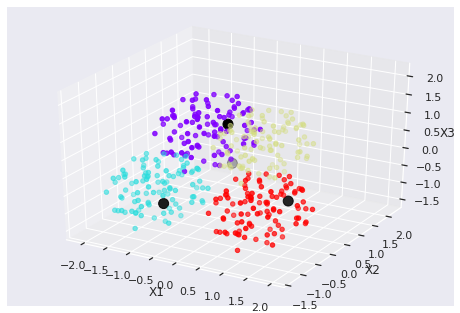

In [662]:
"""predicted class"""

ax = plt.axes(projection='3d')
zline = np.linspace(-2, 2)
xline = np.linspace(-2, 2)
yline = np.linspace(-2, 2)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3');
zdata = data3_K['X1']
xdata = data3_K['X2']
ydata = data3_K['X3'];
ax.scatter3D(xdata, ydata, zdata, c=data3_K['predictor_class'], cmap='rainbow');
ax.scatter3D(dl.cluster_centers_[:,0],dl.cluster_centers_[:,1],dl.cluster_centers_[:,2],s=100,c='black',label ='Centroids');

## **Hierarchical  Clustering/Dendogram**

In [663]:
data3_H = pd.read_csv('Data3.csv')
X = data3_H.iloc[:,1:4].values
data3_H

,Unnamed: 0,X1,X2,X3,Class
0,1,1.295428,0.050829,-0.385217,1
1,2,1.409178,-0.035191,-0.251980,1
2,3,1.096803,0.246365,-0.415011,1
3,4,1.463328,0.265354,-0.513488,1
4,5,1.603284,0.080577,-0.470257,1
...,...,...,...,...,...
395,396,0.795695,0.209456,1.880609,4
396,397,0.653127,-0.703156,1.549448,4
397,398,-0.726249,-0.103244,0.694300,4
398,399,0.808596,-0.492640,1.649370,4


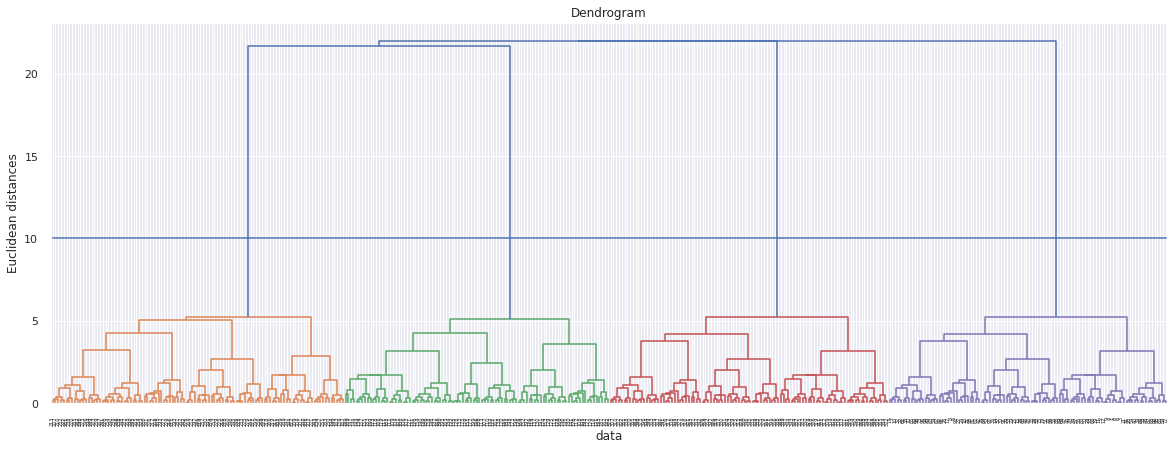

In [664]:
"""Dendogram"""

linked = sch.linkage(X,'ward',metric='euclidean')
plt.figure(figsize=(20, 7))
sch.dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('data')
plt.ylabel('Euclidean distances')
plt.axhline(y=10)
plt.show()



In [665]:

clustering = skc.AgglomerativeClustering(n_clusters=4)
clustering.fit_predict(X)
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,

Que 2

In [666]:
acc=metrics.accuracy_score(data3_H['Class'],clustering.labels_)
print("\nAccuracy_score",acc)
f1_score=metrics.f1_score(data3_H['Class'], clustering.labels_,average='macro')
print("\nF1_score",f1_score)


Accuracy_score 0.25

F1_score 0.2


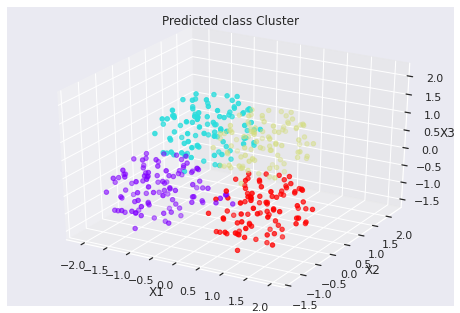

In [667]:
ax = plt.axes(projection='3d')
ax.set_title('Predicted class Cluster');
zline = np.linspace(-4, 4)
xline = np.linspace(-4, 4)
yline = np.linspace(-4, 4) 
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3');
zdata = data3_H['X1']
xdata = data3_H['X2']
ydata = data3_H['X3'];
ax.scatter3D(xdata, ydata, zdata, c=clustering.labels_, cmap='rainbow')

# **Dataset 4**

In [668]:
data4_K = pd.read_csv('Data4.csv')
data4_K['Class'].unique()
data4_K

,Unnamed: 0,X1,X2,X3,Class
0,1,-0.45300,-0.8910,0.02300,1
1,2,0.65300,-0.8460,0.02110,1
2,3,0.39800,0.9130,-0.00139,1
3,4,0.09520,1.0500,0.00628,1
4,5,0.52400,-0.9410,0.03780,1
...,...,...,...,...,...
995,996,0.01520,0.0531,-0.36100,2
996,997,0.05160,0.6910,0.87500,2
997,998,-0.00511,1.3900,-0.94700,2
998,999,-0.06710,0.7140,0.88100,2


## **KMeans for DS4**
Question 1

In [669]:
k = []
wcs = []
for i in range(1, 15):
  mdl = KMeans(n_clusters=i)
  mdl.fit(data4_K.iloc[:,1:4])
  k.append(i)
  wcs.append(mdl.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


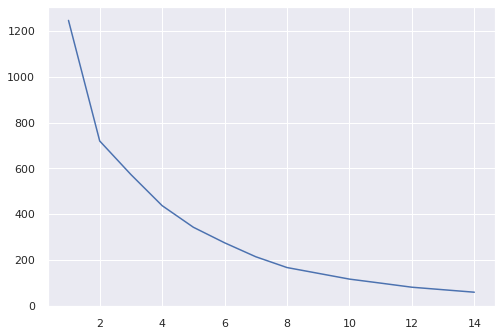

In [670]:
sns.lineplot(k, wcs)

In [671]:
mdl = KMeans(n_clusters=2)
mdl.fit(data4_K.iloc[:,1:4])
data4_K['predictor_class'] = mdl.labels_
mdl.cluster_centers_

array([[-1.66176447e-02, -2.94129933e-01,  8.49923812e-03],
       [ 8.84493587e-04,  1.15671543e+00, -2.43330581e-02]])

Question 2 

In [672]:
acc=metrics.accuracy_score(data4_K['Class'], data4_K['predictor_class'])
print("\nAccuracy_score",acc)
f1_score=metrics.f1_score(data4_K['Class'], data4_K['predictor_class'],average='macro')
print("\nF1_score",f1_score)


Accuracy_score 0.173

F1_score 0.11544878211544878


Question 3

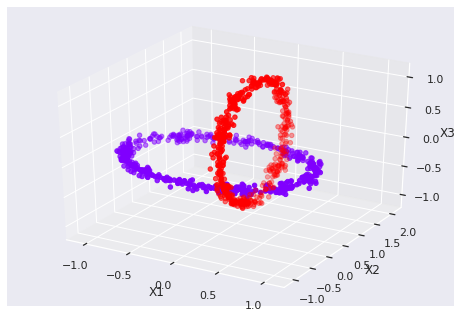

In [673]:

ax = plt.axes(projection='3d')
zline = np.linspace(-4, 4)
xline = np.linspace(-4, 4)
yline = np.linspace(-4, 4)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3');
xdata = data4_K['X1']
ydata = data4_K['X2']
zdata = data4_K['X3'];
ax.scatter3D(xdata, ydata, zdata, c=data4_K['Class'], cmap='rainbow');

Question 4

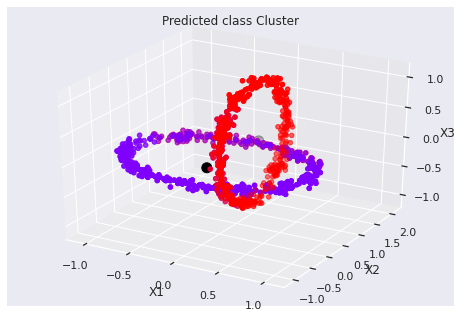

In [674]:

ax = plt.axes(projection='3d')
ax.set_title('Predicted class Cluster');
zline = np.linspace(-4, 4)
xline = np.linspace(-4, 4)
yline = np.linspace(-4, 4) 
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3');
zdata = data4_K['X3']
xdata = data4_K['X1']
ydata = data4_K['X2'];
ax.scatter3D(xdata, ydata, zdata, c=data4_K['predictor_class'], cmap='rainbow');
ax.scatter3D(xdata, ydata, zdata, c=data4_K['Class'], cmap='rainbow');
ax.scatter3D(mdl.cluster_centers_[:,0],mdl.cluster_centers_[:,1],mdl.cluster_centers_[:,2],s=100,c='black',label ='Centroids');

## **Hierarchical  Clustering/Dendogram**

In [675]:
data4_H = pd.read_csv('Data4.csv')
X = data4_H.iloc[:,1:4].values
data4_H

,Unnamed: 0,X1,X2,X3,Class
0,1,-0.45300,-0.8910,0.02300,1
1,2,0.65300,-0.8460,0.02110,1
2,3,0.39800,0.9130,-0.00139,1
3,4,0.09520,1.0500,0.00628,1
4,5,0.52400,-0.9410,0.03780,1
...,...,...,...,...,...
995,996,0.01520,0.0531,-0.36100,2
996,997,0.05160,0.6910,0.87500,2
997,998,-0.00511,1.3900,-0.94700,2
998,999,-0.06710,0.7140,0.88100,2


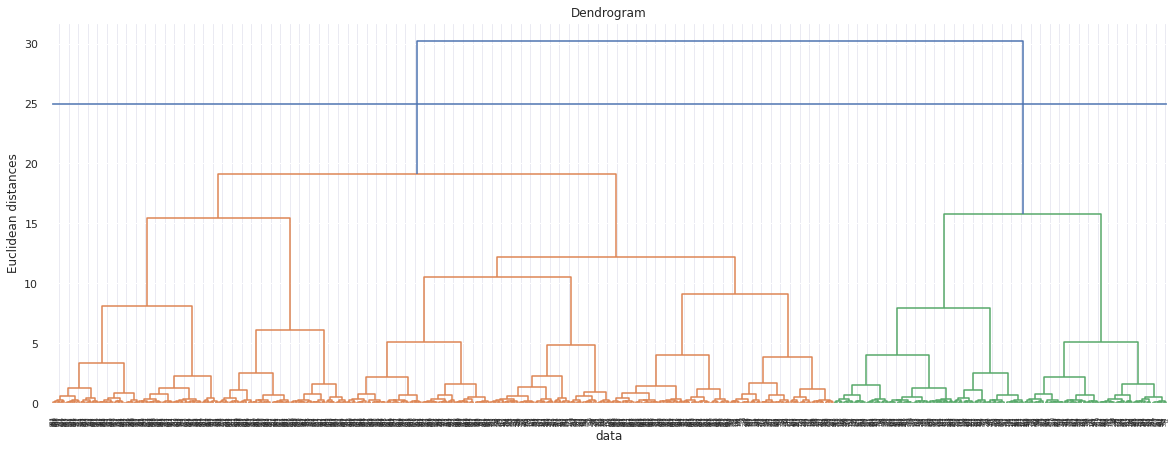

In [676]:
"""Dendogram"""

linked = sch.linkage(X,'ward',metric='euclidean')
plt.figure(figsize=(20, 7))
sch.dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('data')
plt.ylabel('Euclidean distances')
plt.axhline(y=25)
plt.show()

In [677]:

clustering = skc.AgglomerativeClustering(n_clusters=2)
clustering.fit_predict(X)
clustering.labels_


array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,

Que 2

In [678]:
acc=metrics.accuracy_score(data4_H['Class'],clustering.labels_)
print("\nAccuracy_score",acc)
f1_score=metrics.f1_score(data4_H['Class'], clustering.labels_,average='macro')
print("\nF1_score",f1_score)


Accuracy_score 0.299

F1_score 0.24947851481017938


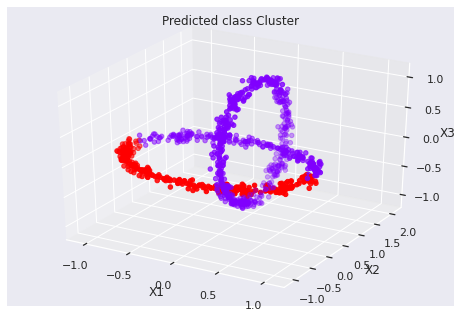

In [679]:
 
ax = plt.axes(projection='3d')
ax.set_title('Predicted class Cluster');
zline = np.linspace(-4, 4)
xline = np.linspace(-4, 4)
yline = np.linspace(-4, 4) 
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3');
zdata = data4_H['X3']
xdata = data4_H['X1']
ydata = data4_H['X2'];
ax.scatter3D(xdata, ydata, zdata, c=clustering.labels_, cmap='rainbow')


# **Dataset 6**

In [680]:
data6_K = pd.read_csv('Data6.csv')
data6_K['Class'].unique()


array([1, 2])

## **KMeans for DS6**
Question 1

In [681]:
k = []
wcs = []
for i in range(1, 15):
  mdl = KMeans(n_clusters=i)
  mdl.fit(data6_K.iloc[:,1:3])
  k.append(i)
  wcs.append(mdl.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


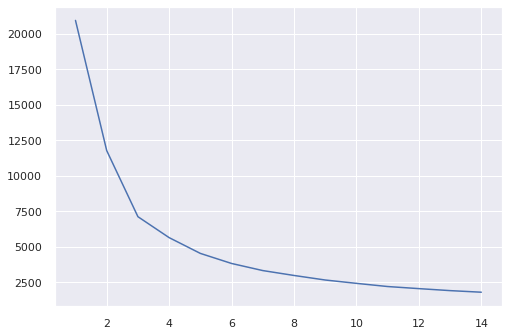

In [682]:
sns.lineplot(k, wcs)

In [683]:
dl = KMeans(n_clusters=2)
dl.fit(data6_K.iloc[:,1:3])
data6_K['predictor_class'] = dl.labels_
dl.cluster_centers_
data6_K

,Unnamed: 0,X1,X2,Class,predictor_class
0,1,1.388261,2.076096,1,1
1,2,2.177247,3.102304,1,1
2,3,0.378645,5.307610,1,1
3,4,3.681732,1.622681,1,1
4,5,2.462861,2.777897,1,1
...,...,...,...,...,...
4091,4092,0.909687,0.375763,2,0
4092,4093,2.698381,0.511262,2,0
4093,4094,1.078797,1.526153,2,0
4094,4095,1.974889,-0.649343,2,0


Question 2 

In [684]:
acc=metrics.accuracy_score(data6_K['Class'], data6_K['predictor_class'])
print("\nAccuracy_score",acc)
f1_score=metrics.f1_score(data6_K['Class'], data6_K['predictor_class'],average='macro')
print("\nF1_score",f1_score)


Accuracy_score 0.48876953125

F1_score 0.31755095566658736


Question 3

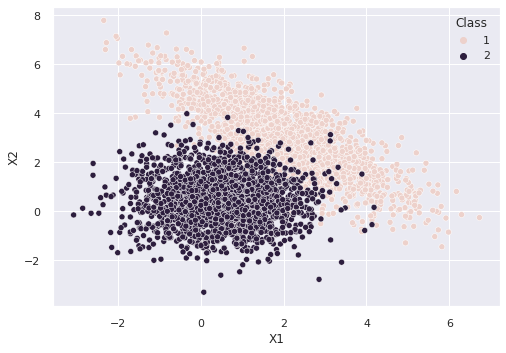

In [685]:
"""original class"""

sns.scatterplot(x='X1', y='X2', data=data6_K, hue='Class')

Question 4

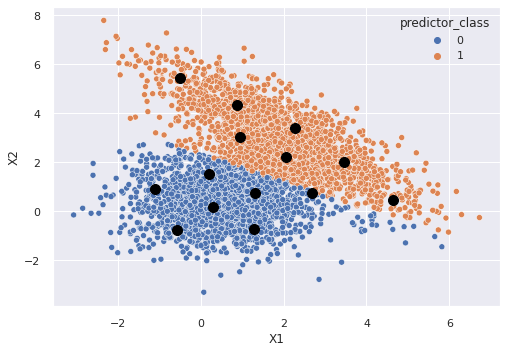

In [686]:
"""predicted class"""

sns.scatterplot(x='X1', y='X2', data=data6_K, hue=data6_K['predictor_class'])
plt.scatter(mdl.cluster_centers_[:, 0], mdl.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.show()

## **Hierarchical  Clustering/Dendogram**

In [687]:
data6_H = pd.read_csv('Data6.csv')
X = data6_H.iloc[:,1:3].values

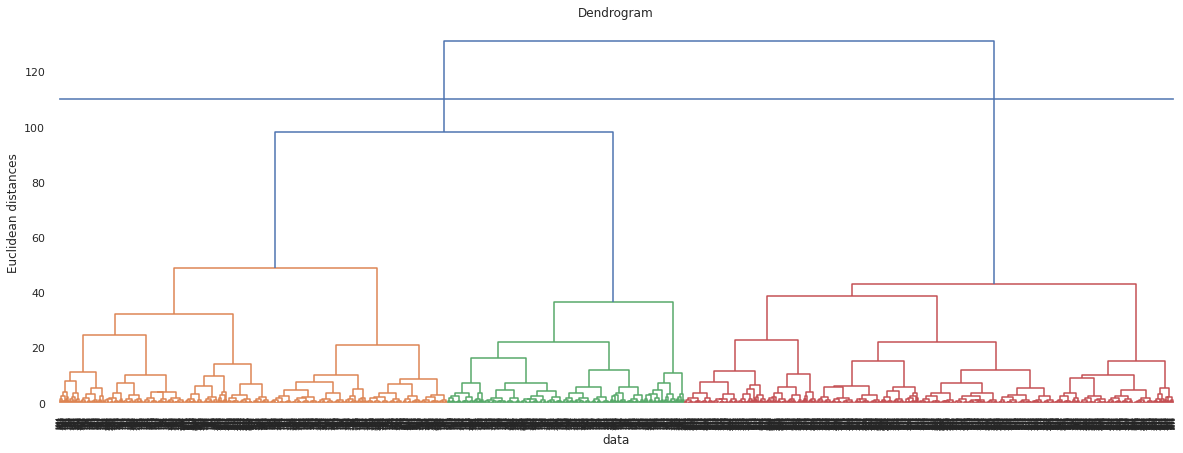

In [688]:
"""Dendogram"""

linked = sch.linkage(X,'ward',metric='euclidean')
plt.figure(figsize=(20, 7))
sch.dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('data')
plt.ylabel('Euclidean distances')
plt.axhline(y=110)
plt.show()

In [689]:

clustering = skc.AgglomerativeClustering(n_clusters=2)
clustering.fit_predict(X)
clustering.labels_



array([0, 0, 0, ..., 1, 1, 1])

Que 2

In [690]:
acc=metrics.accuracy_score(data6_H['Class'],clustering.labels_)
print("\nAccuracy_score",acc)
f1_score=metrics.f1_score(data6_H['Class'], clustering.labels_,average='macro')
print("\nF1_score",f1_score)


Accuracy_score 0.0078125

F1_score 0.005544005544005543


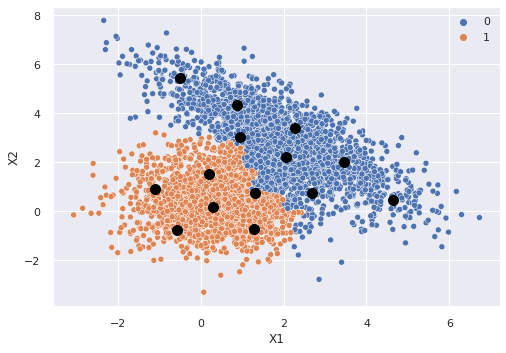

In [691]:
"""predicted class"""

sns.scatterplot(x='X1', y='X2', data=data6_H, hue=clustering.labels_)
plt.scatter(mdl.cluster_centers_[:, 0], mdl.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.show()



### **Data Set 5**

In [692]:
data5_K = pd.read_csv('Data5.csv')
data5_K['Class'].unique()


array([1, 2])

In [693]:
data5_K.iloc[:,1:4]

,X1,X2,X3
0,-4.822490,-50.402170,4.020861
1,-44.460120,20.964670,-11.492060
2,50.001020,0.780748,9.134460
3,-41.699080,-22.310060,16.314120
4,4.425242,-4.666664,50.223740
...,...,...,...
795,-1.531027,0.681636,0.543271
796,0.500754,-1.848209,0.605654
797,1.089574,-0.246493,-3.355758
798,-1.907717,4.964502,2.098423


## **KMeans for DS5**

In [694]:
k = []
wcs = []
for i in range(1, 15):
  mdl = KMeans(n_clusters=i)
  mdl.fit(data5_K.iloc[:,1:4])
  k.append(i)
  wcs.append(mdl.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


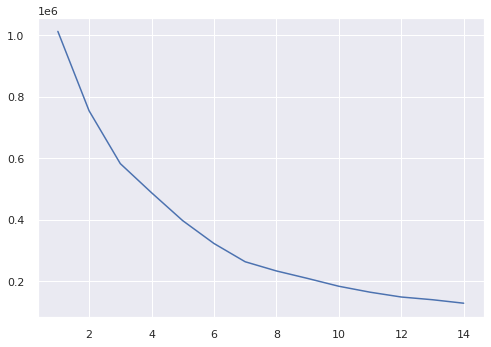

In [695]:
sns.lineplot(k, wcs)

In [696]:
dl = KMeans(n_clusters=6)
dl.fit(data5_K.iloc[:,1:4])
data5_K['predictor_class'] = dl.labels_
dl.cluster_centers_
data5_K

,Unnamed: 0,X1,X2,X3,Class,predictor_class
0,1,-4.822490,-50.402170,4.020861,1,1
1,2,-44.460120,20.964670,-11.492060,1,3
2,3,50.001020,0.780748,9.134460,1,5
3,4,-41.699080,-22.310060,16.314120,1,3
4,5,4.425242,-4.666664,50.223740,1,2
...,...,...,...,...,...,...
795,796,-1.531027,0.681636,0.543271,2,0
796,797,0.500754,-1.848209,0.605654,2,0
797,798,1.089574,-0.246493,-3.355758,2,0
798,799,-1.907717,4.964502,2.098423,2,0


Que 2

In [697]:
acc=metrics.accuracy_score(data5_K['Class'], data5_K['predictor_class'])
print("\nAccuracy_score",acc)
f1_score=metrics.f1_score(data5_K['Class'], data5_K['predictor_class'],average='macro')
print("\nF1_score",f1_score)


Accuracy_score 0.07875

F1_score 0.045356371490280774


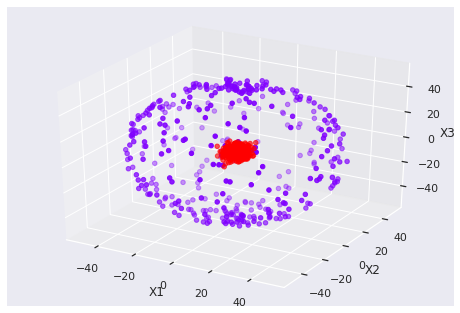

In [698]:
"""original class"""

ax = plt.axes(projection='3d')
zline = np.linspace(-4, 4)
xline = np.linspace(-4, 4)
yline = np.linspace(-4, 4)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3');
zdata = data5_K['X3']
xdata = data5_K['X1']
ydata = data5_K['X2'];
ax.scatter3D(xdata, ydata, zdata, c=data5_K['Class'], cmap='rainbow');

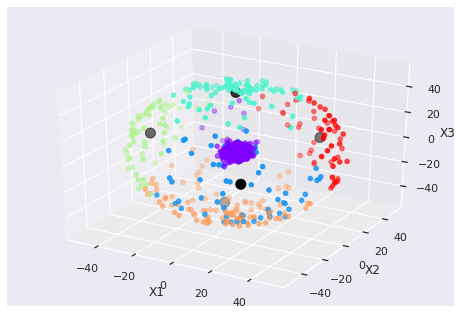

In [699]:
"""predicted class cluster"""

ax = plt.axes(projection='3d')
zline = np.linspace(-4, 4)
xline = np.linspace(-4, 4)
yline = np.linspace(-4, 4)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3');
zdata = data5_K['X3']
xdata = data5_K['X1']
ydata = data5_K['X2'];
ax.scatter3D(xdata, ydata, zdata, c=data5_K['predictor_class'], cmap='rainbow');
ax.scatter3D(dl.cluster_centers_[:,0],dl.cluster_centers_[:,1],dl.cluster_centers_[:,2],s=100,c='black',label ='Centroids');

## **Hierarchical  Clustering/Dendogram**

In [700]:
data5_H = pd.read_csv('Data5.csv')
X = data5_H.iloc[:,1:4].values
X

array([[ -4.82249  , -50.40217  ,   4.020861 ],
       [-44.46012  ,  20.96467  , -11.49206  ],
       [ 50.00102  ,   0.7807481,   9.13446  ],
       ...,
       [  1.089574 ,  -0.2464933,  -3.355758 ],
       [ -1.907717 ,   4.964502 ,   2.098423 ],
       [  3.415463 ,   4.529521 ,  -1.617736 ]])

In [701]:
data5_H.iloc[:,1:4]

,X1,X2,X3
0,-4.822490,-50.402170,4.020861
1,-44.460120,20.964670,-11.492060
2,50.001020,0.780748,9.134460
3,-41.699080,-22.310060,16.314120
4,4.425242,-4.666664,50.223740
...,...,...,...
795,-1.531027,0.681636,0.543271
796,0.500754,-1.848209,0.605654
797,1.089574,-0.246493,-3.355758
798,-1.907717,4.964502,2.098423


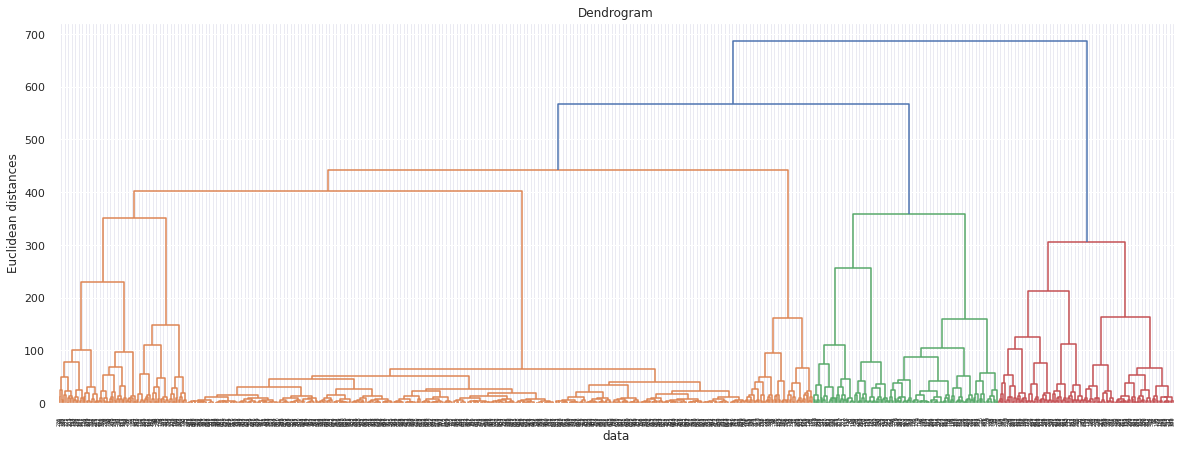

In [702]:
""" Dendogram"""

linked = sch.linkage(X,'ward',metric='euclidean')
plt.figure(figsize=(20, 7))
sch.dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('data')
plt.ylabel('Euclidean distances')
plt.show()

In [703]:

clustering = skc.AgglomerativeClustering(n_clusters=2)
clustering.fit_predict(X)
clustering.labels_


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,

Que 2

In [704]:
acc=metrics.accuracy_score(data5_H['Class'],clustering.labels_)
print("\nAccuracy_score",acc)
f1_score=metrics.f1_score(data5_H['Class'], clustering.labels_,average='macro')
print("\nF1_score",f1_score)


Accuracy_score 0.1575

F1_score 0.1596958174904943


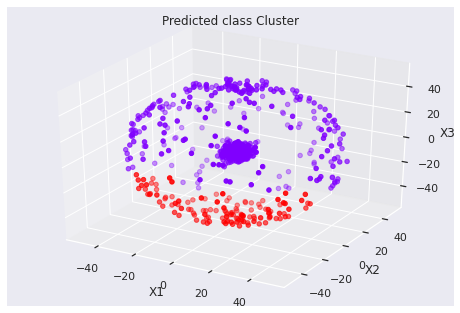

In [705]:
"""Predicted class cluster"""

ax = plt.axes(projection='3d')
ax.set_title('Predicted class Cluster');
zline = np.linspace(-4, 4)
xline = np.linspace(-4, 4)
yline = np.linspace(-4, 4) 
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3');
zdata = data5_H['X3']
xdata = data5_H['X1']
ydata = data5_H['X2'];
ax.scatter3D(xdata, ydata, zdata, c=clustering.labels_, cmap='rainbow')

Data Set 7


In [706]:
data7_K = pd.read_csv('Data7.csv')
data7_K['Class'].unique()

array([5, 4, 6, 3, 1, 2])

Kmeans for 7

In [707]:
k = []
wcs = []
for i in range(1, 15):
  mdl = KMeans(n_clusters=i)
  mdl.fit(data7_K.iloc[:,1:3])
  k.append(i)
  wcs.append(mdl.inertia_)

In [708]:
data7_K.iloc[:,1:3]

,X1,X2
0,-3.000000,-3.000000
1,-3.000000,3.000000
2,3.000000,-3.000000
3,3.000000,3.000000
4,-0.417091,0.114782
...,...,...
765,-1.604434,-1.118861
766,-3.050000,-3.050000
767,-3.050000,2.950000
768,2.950000,-3.050000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


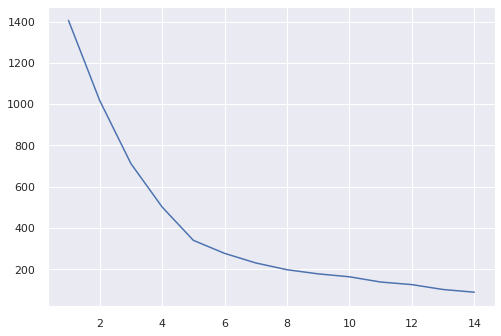

In [709]:
sns.lineplot(k, wcs)

In [710]:
dl = KMeans(n_clusters=5)
dl.fit(data7_K.iloc[:,1:3])
data7_K['predictor_class'] = dl.labels_
dl.cluster_centers_
data7_K

,Unnamed: 0,X1,X2,Class,predictor_class
0,1,-3.000000,-3.000000,5,0
1,2,-3.000000,3.000000,4,3
2,3,3.000000,-3.000000,6,4
3,4,3.000000,3.000000,3,1
4,5,-0.417091,0.114782,1,2
...,...,...,...,...,...
765,766,-1.604434,-1.118861,2,0
766,767,-3.050000,-3.050000,5,0
767,768,-3.050000,2.950000,4,3
768,769,2.950000,-3.050000,6,4


In [711]:
acc=metrics.accuracy_score(data7_K['Class'], data7_K['predictor_class'])
print("\nAccuracy_score",acc)
f1_score=metrics.f1_score(data7_K['Class'], data7_K['predictor_class'],average='macro')
print("\nF1_score",f1_score)


Accuracy_score 0.0

F1_score 0.0


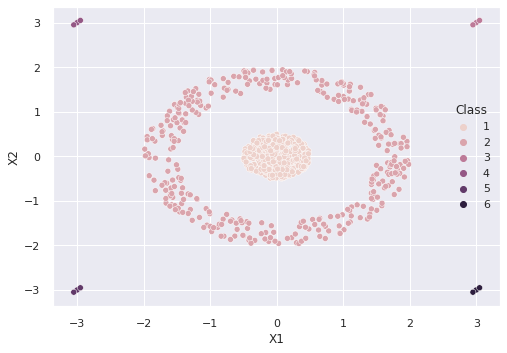

In [712]:
"""original class """

sns.scatterplot(x='X1', y='X2', data=data7_K, hue='Class')

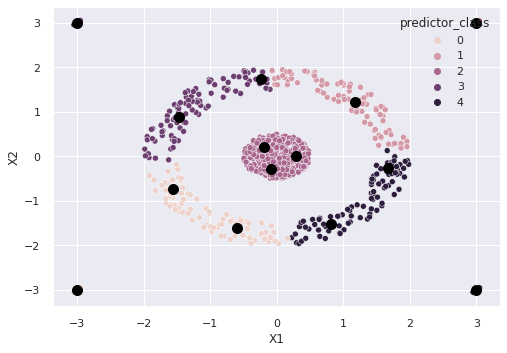

In [713]:
"""predicted class """
sns.scatterplot(x='X1', y='X2', data=data7_K, hue=data7_K['predictor_class'])
plt.scatter(mdl.cluster_centers_[:, 0], mdl.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.show()

In [714]:
data7_H = pd.read_csv('Data7.csv')
X = data7_H.iloc[:,1:3].values

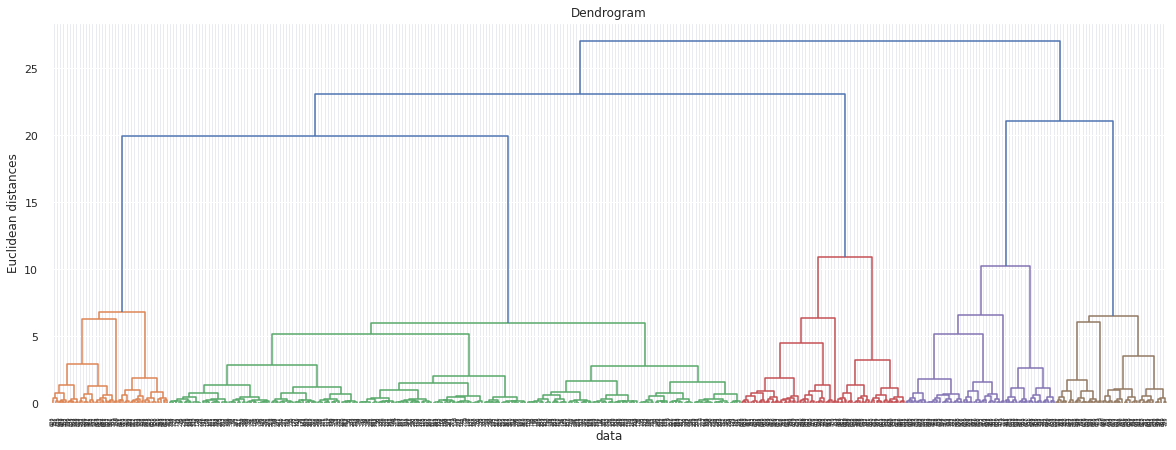

In [715]:
"""Dendogram"""

linked = sch.linkage(X,'ward',metric='euclidean')
plt.figure(figsize=(20, 7))
sch.dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('data')
plt.ylabel('Euclidean distances')
plt.axhline(y=110)
plt.show()

In [716]:

clustering = skc.AgglomerativeClustering(n_clusters=6)
clustering.fit_predict(X)
clustering.labels_



array([2, 3, 0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

Que 2

In [717]:
acc=metrics.accuracy_score(data7_H['Class'],clustering.labels_)
print("\nAccuracy_score",acc)
f1_score=metrics.f1_score(data7_H['Class'], clustering.labels_,average='macro')
print("\nF1_score",f1_score)


Accuracy_score 0.1012987012987013

F1_score 0.05019305019305019


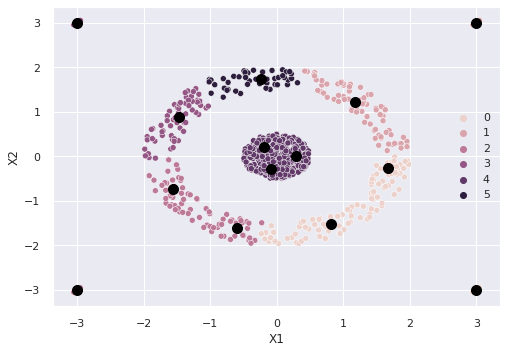

In [718]:
sns.scatterplot(x='X1', y='X2', data=data7_H, hue=clustering.labels_)
plt.scatter(mdl.cluster_centers_[:, 0], mdl.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.show()

# Data Set 8

In [719]:
data8_K = pd.read_csv('Data8.csv')
data8_K

,Unnamed: 0,X1,X2,X3,Class
0,1,0.000000,0.000000,1.00000,1
1,2,0.000000,0.052336,0.99863,1
2,3,0.049774,0.016173,0.99863,1
3,4,0.030762,-0.042341,0.99863,1
4,5,-0.030762,-0.042341,0.99863,1
...,...,...,...,...,...
3997,3998,0.049774,-0.016173,-0.99863,1
3998,3999,0.000000,-0.052336,-0.99863,1
3999,4000,-0.049774,-0.016173,-0.99863,1
4000,4001,-0.030762,0.042341,-0.99863,1


In [720]:
data8_K['Class'].unique()

array([1])

In [721]:
k = []
wcs = []
for i in range(1, 15):
  mdl = KMeans(n_clusters=i)
  mdl.fit(data8_K.iloc[:,1:4])
  k.append(i)
  wcs.append(mdl.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


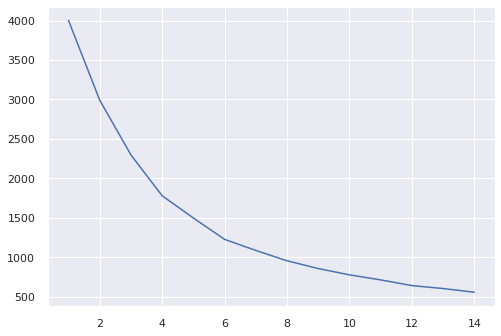

In [722]:
sns.lineplot(k, wcs)

In [723]:
dl = KMeans(n_clusters=1)
dl.fit(data8_K.iloc[:,1:4])
data8_K['predictor_class'] = dl.labels_
dl.cluster_centers_
data8_K

,Unnamed: 0,X1,X2,X3,Class,predictor_class
0,1,0.000000,0.000000,1.00000,1,0
1,2,0.000000,0.052336,0.99863,1,0
2,3,0.049774,0.016173,0.99863,1,0
3,4,0.030762,-0.042341,0.99863,1,0
4,5,-0.030762,-0.042341,0.99863,1,0
...,...,...,...,...,...,...
3997,3998,0.049774,-0.016173,-0.99863,1,0
3998,3999,0.000000,-0.052336,-0.99863,1,0
3999,4000,-0.049774,-0.016173,-0.99863,1,0
4000,4001,-0.030762,0.042341,-0.99863,1,0


Que 2

In [724]:
acc=metrics.accuracy_score(data8_K['Class'], data8_K['predictor_class'])
print("\nAccuracy_score",acc)
f1_score=metrics.f1_score(data8_K['Class'], data8_K['predictor_class'],average='macro')
print("\nF1_score",f1_score)


Accuracy_score 0.0

F1_score 0.0


Que 3

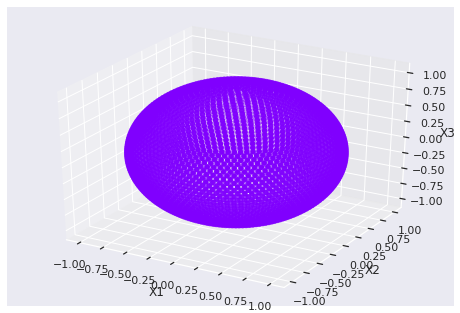

In [725]:
"""original class"""

ax = plt.axes(projection='3d')
zline = np.linspace(-4, 4)
xline = np.linspace(-4, 4)
yline = np.linspace(-4, 4)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3');
zdata = data8_K['X3']
xdata = data8_K['X1']
ydata = data8_K['X2'];
ax.scatter3D(xdata, ydata, zdata, c=data8_K['Class'], cmap='rainbow');

Que 4

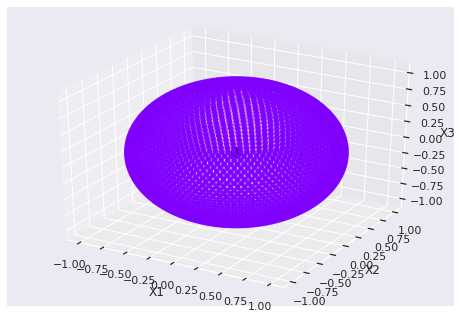

In [726]:
"""predicted class"""
ax = plt.axes(projection='3d')
zline = np.linspace(-4, 4)
xline = np.linspace(-4, 4)
yline = np.linspace(-4, 4)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3');
zdata = data8_K['X3']
xdata = data8_K['X1']
ydata = data8_K['X2'];
ax.scatter3D(xdata, ydata, zdata, c=data8_K['predictor_class'], cmap='rainbow');
ax.scatter3D(dl.cluster_centers_[:,0],dl.cluster_centers_[:,1],dl.cluster_centers_[:,2],s=100,c='black',label ='Centroids');

In [727]:
data8_H = pd.read_csv('Data8.csv')
X = data8_H.iloc[:,1:4].values
X

array([[ 0.      ,  0.      ,  1.      ],
       [ 0.      ,  0.052336,  0.99863 ],
       [ 0.049774,  0.016173,  0.99863 ],
       ...,
       [-0.049774, -0.016173, -0.99863 ],
       [-0.030762,  0.042341, -0.99863 ],
       [ 0.      ,  0.      , -1.      ]])

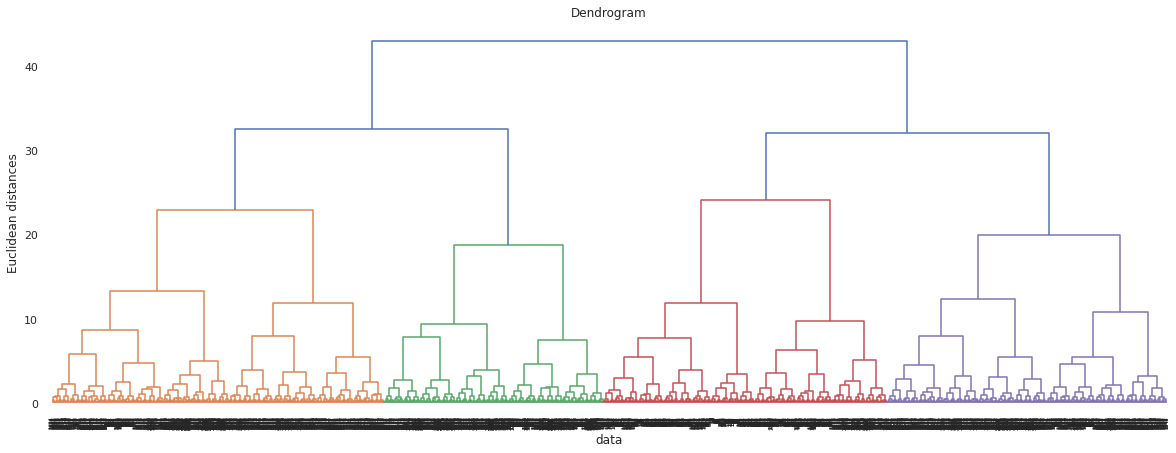

In [728]:
"""Dendogram"""

linked = sch.linkage(X,'ward',metric='euclidean')
plt.figure(figsize=(20, 7))
sch.dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('data')
plt.ylabel('Euclidean distances')
plt.show()

In [729]:

clustering = skc.AgglomerativeClustering(n_clusters=1)
clustering.fit_predict(X)
clustering.labels_



array([0, 0, 0, ..., 0, 0, 0])

Que 2

In [730]:
acc=metrics.accuracy_score(data8_H['Class'],clustering.labels_)
print("\nAccuracy_score",acc)
f1_score=metrics.f1_score(data8_H['Class'], clustering.labels_,average='macro')
print("\nF1_score",f1_score)


Accuracy_score 0.0

F1_score 0.0


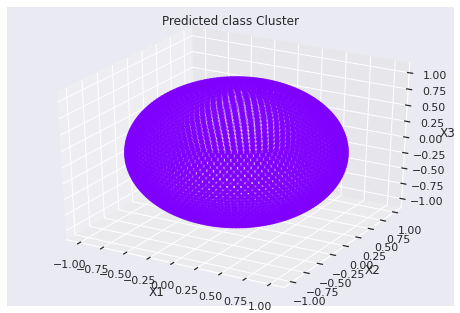

In [731]:
"""predicted class cluster"""

ax = plt.axes(projection='3d')
ax.set_title('Predicted class Cluster');
zline = np.linspace(-4, 4)
xline = np.linspace(-4, 4)
yline = np.linspace(-4, 4) 
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3');
zdata = data8_H['X3']
xdata = data8_H['X1']
ydata = data8_H['X2'];
ax.scatter3D(xdata, ydata, zdata, c=clustering.labels_, cmap='rainbow')

**Task 2**

EVALUATION MATRIX: Given these quantities, the Dunn index for a set of clusters C, DI(C), is then defined by:

DI(C)= (minckЄCdδ(ck, c1))/ (maxekЄCAΔ(ck))

DIm= (min1≤i≤j≤mδ(Ci,Cj))/(max1≤k≤mΔk)


In [732]:
import pandas as pd

In [733]:
from google.colab import files
uploaded=files.upload()

Saving World Indicators.csv to World Indicators (3).csv


In [734]:
df=pd.read_csv('World Indicators.csv')
df

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,41852.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,13576.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,3761.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,NaN,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,2215.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,NaN,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,NaN,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.907,The Americas,Turks and Caicos Islands
204,0.013,46.5%,5.0,2191193.0,"$15,533,800,000,000",0.177,"$8,467",187.0,0.006,0.7,0.033,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States
205,0.015,41.9%,7.0,4430.0,"$47,236,710,623",0.088,"$1,213",336.0,0.010,0.5,0.098,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay
206,0.020,62.8%,141.0,70198.0,"$316,482,176,579",0.045,$487,864.0,0.014,0.4,0.172,77.0,71.0,1.0,0.291,0.651,0.058,0.888,The Americas,"Venezuela, RB"


In [735]:
df.head

<bound method NDFrame.head of      Birth Rate Business Tax Rate  Days to Start Business  Energy Usage  \
0         0.025             72.0%                    25.0       41852.0   
1         0.046             52.1%                    66.0       13576.0   
2         0.037             65.9%                    29.0        3761.0   
3         0.024             19.5%                    60.0        2215.0   
4         0.042             43.5%                    13.0           NaN   
..          ...               ...                     ...           ...   
203         NaN               NaN                     NaN           NaN   
204       0.013             46.5%                     5.0     2191193.0   
205       0.015             41.9%                     7.0        4430.0   
206       0.020             62.8%                   141.0       70198.0   
207       0.011               NaN                     NaN           NaN   

                     GDP  Health Exp % GDP Health Exp/Capita  Hours t

In [736]:
df.isnull().sum()

Birth Rate                 9
Business Tax Rate         27
Days to Start Business    27
Energy Usage              72
GDP                       20
Health Exp % GDP          23
Health Exp/Capita         23
Hours to do Tax           28
Infant Mortality Rate     20
Internet Usage             9
Lending Interest          77
Life Expectancy Female    11
Life Expectancy Male      11
Mobile Phone Usage        12
Population 0-14           17
Population 15-64          17
Population 65+            17
Population Urban           2
Region                     0
Country                    0
dtype: int64

In [737]:
"""dropping columns"""

df1=df.drop(columns=['Energy Usage', 'Lending Interest'])
df1

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.907,The Americas,Turks and Caicos Islands
204,0.013,46.5%,5.0,"$15,533,800,000,000",0.177,"$8,467",187.0,0.006,0.7,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States
205,0.015,41.9%,7.0,"$47,236,710,623",0.088,"$1,213",336.0,0.010,0.5,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay
206,0.020,62.8%,141.0,"$316,482,176,579",0.045,$487,864.0,0.014,0.4,77.0,71.0,1.0,0.291,0.651,0.058,0.888,The Americas,"Venezuela, RB"


In [738]:
df1=df1.dropna()

In [739]:
df1['GDP'] = df1['GDP'].str.replace(',', '')
df1['GDP'] = df1['GDP'].str.replace('$', '')
df1['GDP'] = df1['GDP'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [740]:
df1['Health Exp/Capita'] = df1['Health Exp/Capita'].str.replace(',', '')
df1['Health Exp/Capita'] = df1['Health Exp/Capita'].str.replace('$', '')
df1['Health Exp/Capita'] = df1['Health Exp/Capita'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [741]:
df1

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,199070864638,0.044,233,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,104115863405,0.034,178,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,7294900431,0.045,34,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,15292424757,0.052,404,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,10395757480,0.064,39,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.018,27.9%,694.0,4363219094,0.060,490,199.0,0.022,0.3,74.0,67.0,1.0,0.283,0.652,0.065,0.663,The Americas,Suriname
202,0.015,29.1%,41.0,23676348287,0.053,935,210.0,0.020,0.6,73.0,66.0,1.4,0.207,0.708,0.085,0.089,The Americas,Trinidad and Tobago
204,0.013,46.5%,5.0,15533800000000,0.177,8467,187.0,0.006,0.7,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States
205,0.015,41.9%,7.0,47236710623,0.088,1213,336.0,0.010,0.5,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay


In [742]:
duplicateRows = df1[df1.duplicated()]
duplicateRows.count()

Birth Rate                0
Business Tax Rate         0
Days to Start Business    0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Hours to do Tax           0
Infant Mortality Rate     0
Internet Usage            0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Urban          0
Region                    0
Country                   0
dtype: int64

In [743]:
df1.dtypes

Birth Rate                float64
Business Tax Rate          object
Days to Start Business    float64
GDP                         int64
Health Exp % GDP          float64
Health Exp/Capita           int64
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Urban          float64
Region                     object
Country                    object
dtype: object

In [744]:
df1['Business Tax Rate'] = df1['Business Tax Rate'].str.replace('%', '')
df1['Business Tax Rate'] = df1['Business Tax Rate'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [745]:
df1

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0,25.0,199070864638,0.044,233,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1,66.0,104115863405,0.034,178,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9,29.0,7294900431,0.045,34,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5,60.0,15292424757,0.052,404,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5,13.0,10395757480,0.064,39,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.018,27.9,694.0,4363219094,0.060,490,199.0,0.022,0.3,74.0,67.0,1.0,0.283,0.652,0.065,0.663,The Americas,Suriname
202,0.015,29.1,41.0,23676348287,0.053,935,210.0,0.020,0.6,73.0,66.0,1.4,0.207,0.708,0.085,0.089,The Americas,Trinidad and Tobago
204,0.013,46.5,5.0,15533800000000,0.177,8467,187.0,0.006,0.7,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States
205,0.015,41.9,7.0,47236710623,0.088,1213,336.0,0.010,0.5,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay


In [746]:
"""df2 = df1.loc[:,['Business Tax Rate', 'GDP', 'Health Exp/Capita', 'Population 15-64', 'Population Urban']]"""

df2=df1.iloc[:,1:16]
df2

,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban
0,72.0,25.0,199070864638,0.044,233,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682
1,52.1,66.0,104115863405,0.034,178,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409
2,65.9,29.0,7294900431,0.045,34,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423
3,19.5,60.0,15292424757,0.052,404,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565
4,43.5,13.0,10395757480,0.064,39,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,27.9,694.0,4363219094,0.060,490,199.0,0.022,0.3,74.0,67.0,1.0,0.283,0.652,0.065,0.663
202,29.1,41.0,23676348287,0.053,935,210.0,0.020,0.6,73.0,66.0,1.4,0.207,0.708,0.085,0.089
204,46.5,5.0,15533800000000,0.177,8467,187.0,0.006,0.7,81.0,76.0,0.9,0.197,0.669,0.133,0.809
205,41.9,7.0,47236710623,0.088,1213,336.0,0.010,0.5,80.0,73.0,1.4,0.223,0.638,0.139,0.946


In [747]:
from sklearn.preprocessing import MinMaxScaler
 
"""create data"""

 
"""scale features"""

scaler = MinMaxScaler()
model=scaler.fit(df2)
scaled_data=model.transform(df2)
 
"""print scaled features"""

print(scaled_data)

[[1.92319323e-01 3.46320346e-02 1.28043889e-02 ... 5.39267016e-01
  1.88034188e-01 6.50933041e-01]
 [1.32143937e-01 9.37950938e-02 6.69152186e-03 ... 6.28272251e-02
  8.97435897e-02 3.51262349e-01]
 [1.73873601e-01 4.04040404e-02 4.58530796e-04 ... 1.67539267e-01
  1.11111111e-01 3.66630077e-01]
 ...
 [1.15210160e-01 5.77200577e-03 1.00000000e+00 ... 5.07853403e-01
  5.55555556e-01 7.90340285e-01]
 [1.01300272e-01 8.65800866e-03 3.02984323e-03 ... 4.26701571e-01
  5.81196581e-01 9.40724479e-01]
 [1.64499546e-01 2.02020202e-01 2.03629138e-02 ... 4.60732984e-01
  2.35042735e-01 8.77058178e-01]]


In [748]:
"""Importing libraries"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn import metrics
import scipy.cluster.hierarchy as sch
import sklearn.cluster as sc
import sklearn.metrics.cluster as smc

In [749]:
! pip install yellowbrick
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


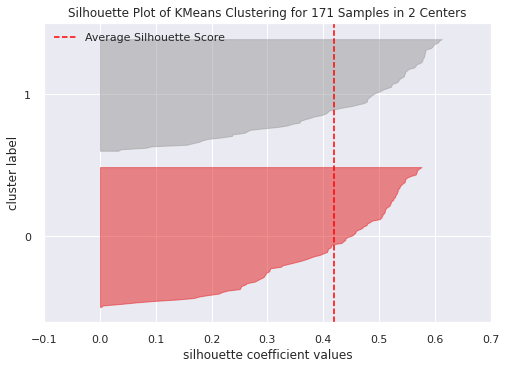

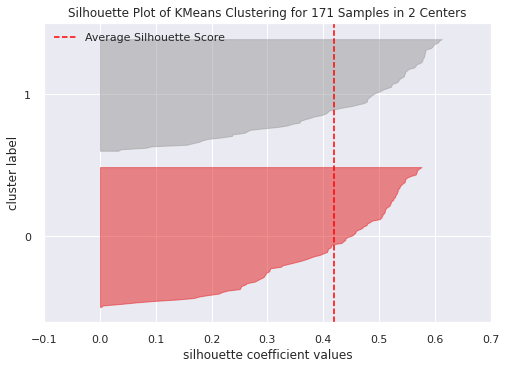

In [750]:
"""Silhouette Plot"""

X = scaled_data
model = KMeans(random_state=42)

model_4clust = KMeans(n_clusters = 2, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(X)    
sil_visualizer.show() 

X = scaled_data
model = KMeans(random_state=42)

model_4clust = KMeans(n_clusters = 2, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(X)    
sil_visualizer.show() 

In [751]:
dl = KMeans(n_clusters=2)
dl.fit(df2.iloc[:,:])
df1['k_cluster'] = dl.labels_
dl.cluster_centers_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([[5.28000000e+01, 2.16666667e+01, 9.58710761e+12, 1.09333333e-01,
        4.46066667e+03, 2.91666667e+02, 7.00000000e-03, 6.33333333e-01,
        8.10000000e+01, 7.63333333e+01, 8.66666667e-01, 1.69666667e-01,
        6.78333333e-01, 1.51666667e-01, 7.42333333e-01],
       [4.50232143e+01, 3.08869048e+01, 2.46932686e+11, 6.72559524e-02,
        1.02156548e+03, 2.83833333e+02, 2.77619048e-02, 3.57142857e-01,
        7.20297619e+01, 6.73571429e+01, 9.52380952e-01, 2.91333333e-01,
        6.32601190e-01, 7.60119048e-02, 5.53178571e-01]])

In [752]:
X = scaled_data
X

array([[1.92319323e-01, 3.46320346e-02, 1.28043889e-02, ...,
        5.39267016e-01, 1.88034188e-01, 6.50933041e-01],
       [1.32143937e-01, 9.37950938e-02, 6.69152186e-03, ...,
        6.28272251e-02, 8.97435897e-02, 3.51262349e-01],
       [1.73873601e-01, 4.04040404e-02, 4.58530796e-04, ...,
        1.67539267e-01, 1.11111111e-01, 3.66630077e-01],
       ...,
       [1.15210160e-01, 5.77200577e-03, 1.00000000e+00, ...,
        5.07853403e-01, 5.55555556e-01, 7.90340285e-01],
       [1.01300272e-01, 8.65800866e-03, 3.02984323e-03, ...,
        4.26701571e-01, 5.81196581e-01, 9.40724479e-01],
       [1.64499546e-01, 2.02020202e-01, 2.03629138e-02, ...,
        4.60732984e-01, 2.35042735e-01, 8.77058178e-01]])

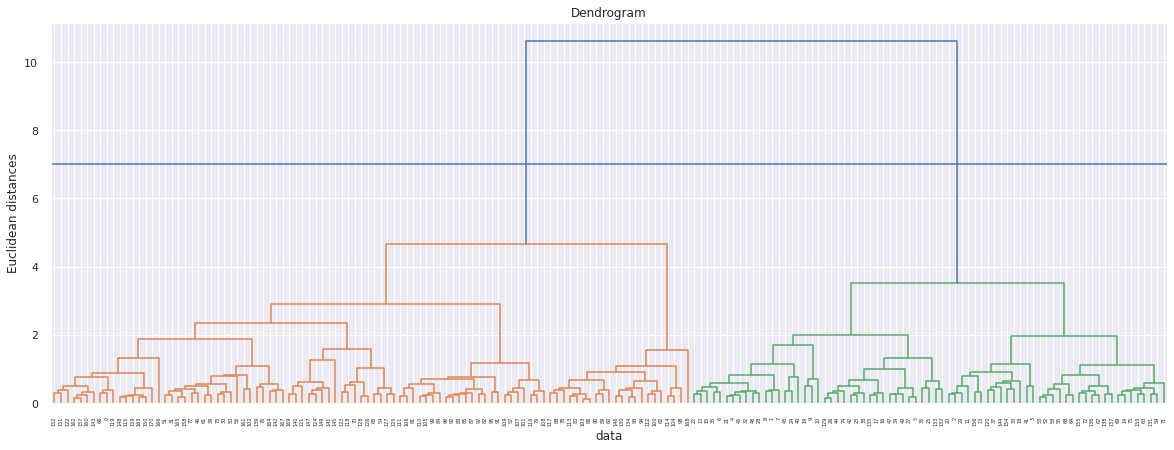

In [753]:
linked = sch.linkage(X,'ward',metric='euclidean')
plt.figure(figsize=(20, 7))
sch.dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('data')
plt.ylabel('Euclidean distances')
plt.axhline(y=7)
plt.show()

In [754]:
pip install validclust

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [755]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from validclust import ValidClust

In [756]:
"""Validation"""

vclust = ValidClust(
    k=2, 
    methods=['hierarchical', 'kmeans']
)
cvi_vals = vclust.fit_predict(scaled_data)
print(cvi_vals)

                                  2
method       index                 
hierarchical silhouette    0.407312
             calinski    172.614512
             davies        0.918441
             dunn          0.111163
kmeans       silhouette    0.418785
             calinski    180.450315
             davies        0.906428
             dunn          0.121522


In [757]:
clustering = sc.AgglomerativeClustering(n_clusters=2)
z = clustering.fit_predict(X)
z

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [758]:
df1['h_cluster']= z
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country,k_cluster,h_cluster
0,0.025,72.0,25.0,199070864638,0.044,233,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria,1,0
1,0.046,52.1,66.0,104115863405,0.034,178,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola,1,1
2,0.037,65.9,29.0,7294900431,0.045,34,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin,1,1
3,0.024,19.5,60.0,15292424757,0.052,404,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana,1,1
4,0.042,43.5,13.0,10395757480,0.064,39,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.018,27.9,694.0,4363219094,0.060,490,199.0,0.022,0.3,74.0,67.0,1.0,0.283,0.652,0.065,0.663,The Americas,Suriname,1,0
202,0.015,29.1,41.0,23676348287,0.053,935,210.0,0.020,0.6,73.0,66.0,1.4,0.207,0.708,0.085,0.089,The Americas,Trinidad and Tobago,1,0
204,0.013,46.5,5.0,15533800000000,0.177,8467,187.0,0.006,0.7,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States,0,0
205,0.015,41.9,7.0,47236710623,0.088,1213,336.0,0.010,0.5,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay,1,0


In [759]:
"""detailed list of groups"""

df1[['Country','k_cluster']].sort_values(by='k_cluster')

,Country,k_cluster
204,United States,0
65,Japan,0
60,China,0
0,Algeria,1
127,Slovak Republic,1
...,...,...
64,Indonesia,1
66,Kazakhstan,1
68,"Korea, Rep.",1
56,Bangladesh,1


In [760]:
df1[['Country','h_cluster']].sort_values(by='h_cluster')

,Country,h_cluster
0,Algeria,0
115,Malta,0
116,Moldova,0
118,Montenegro,0
119,Netherlands,0
...,...,...
38,Sao Tome and Principe,1
39,Senegal,1
81,Tajikistan,1
155,"Micronesia, Fed. Sts.",1


"""With respect to Dunn index higher the value better the clustering according to our models kmeans has slightly higher Dunn index than hierarchical so kmeans will be better clustering method"""

Text(0.5, 1.0, 'Birth Rate vs Infant Mortality Rate')

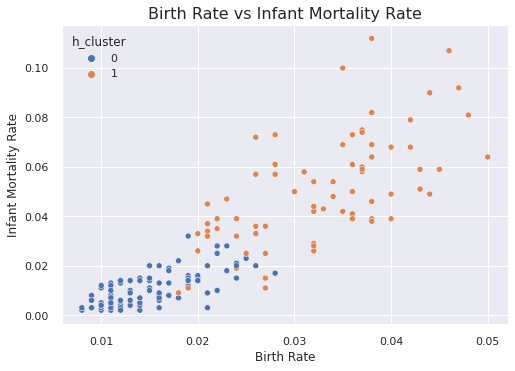

In [761]:
"""Scatter Plot"""

import matplotlib.pyplot as plt
sns.scatterplot(x='Birth Rate', y='Infant Mortality Rate', data=df1, hue='h_cluster',palette="deep")

plt.title("Birth Rate vs Infant Mortality Rate", fontsize= 16)

Text(0.5, 1.0, 'Internet Usage vs Population 15-64')

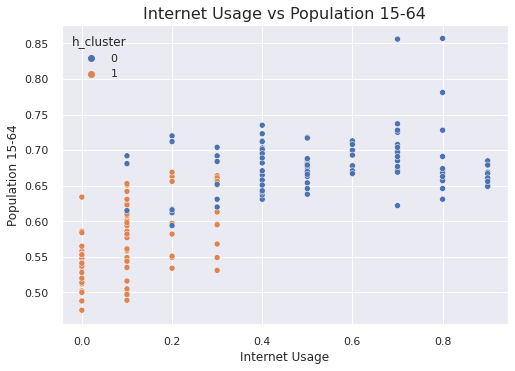

In [762]:
"""Scatter Plot"""

import matplotlib.pyplot as plt
sns.scatterplot(x='Internet Usage', y='Population 15-64', data=df1, hue='h_cluster',palette="deep")

plt.title("Internet Usage vs Population 15-64", fontsize= 16)

Text(0.5, 1.0, 'Life Expectancy Female vs Life Expectancy male')

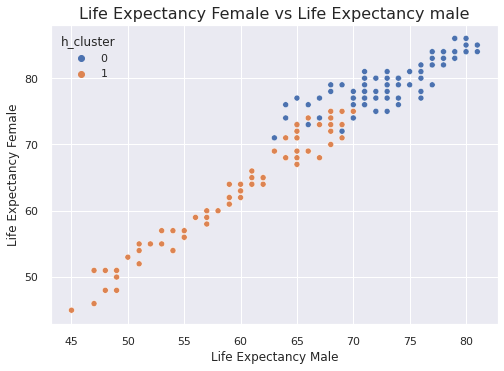

In [763]:
"""Scatter Plot"""

import matplotlib.pyplot as plt
sns.scatterplot(x='Life Expectancy Male', y='Life Expectancy Female', data=df1, hue='h_cluster',palette="deep")

plt.title("Life Expectancy Female vs Life Expectancy male", fontsize= 16)

Text(0.5, 1.0, 'Internet Usage vs Population Urban')

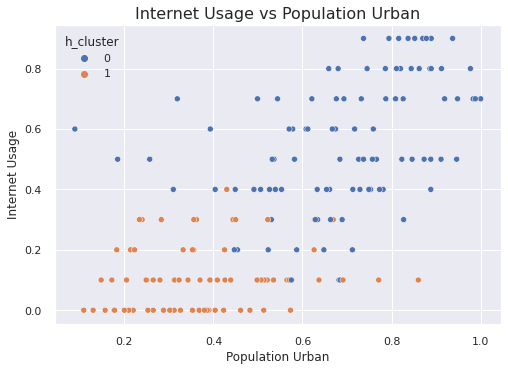

In [764]:
"""Scatter Plot"""

import matplotlib.pyplot as plt
sns.scatterplot(x='Population Urban', y='Internet Usage', data=df1, hue='h_cluster',palette="deep")

plt.title("Internet Usage vs Population Urban", fontsize= 16)